In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math, time, random, datetime

plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')


In [161]:
conda install -c conda-forge missingno

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\anaconda3

  added / updated specs:
    - missingno


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.10.1-py38haa95532_1 --> conda-forge::conda-4.10.1-py38haa244fe_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [162]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\anaconda3

  added / updated specs:
    - conda


The following packages will be UPDATED:

  conda              conda-forge::conda-4.10.1-py38haa244f~ --> pkgs/main::conda-4.10.1-py38haa95532_1


Preparing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [163]:
conda install -c conda-forge catboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\anaconda3

  added / updated specs:
    - catboost


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.10.1-py38haa95532_1 --> conda-forge::conda-4.10.1-py38haa244fe_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [164]:
import catboost

In [165]:
from catboost import CatBoostClassifier, Pool, cv

In [166]:
import missingno

In [167]:
train=pd.read_csv('train.csv')

In [168]:
test=pd.read_csv('test.csv')

In [169]:
gender_submission=pd.read_csv('gender_submission.csv')

In [170]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<AxesSubplot:ylabel='Frequency'>

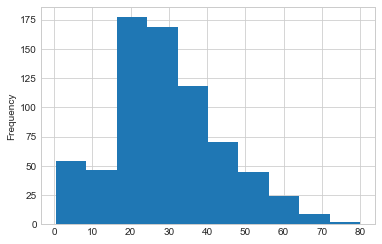

In [171]:
train.Age.plot.hist()

In [172]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [173]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [174]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [175]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [176]:
gender_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


<AxesSubplot:>

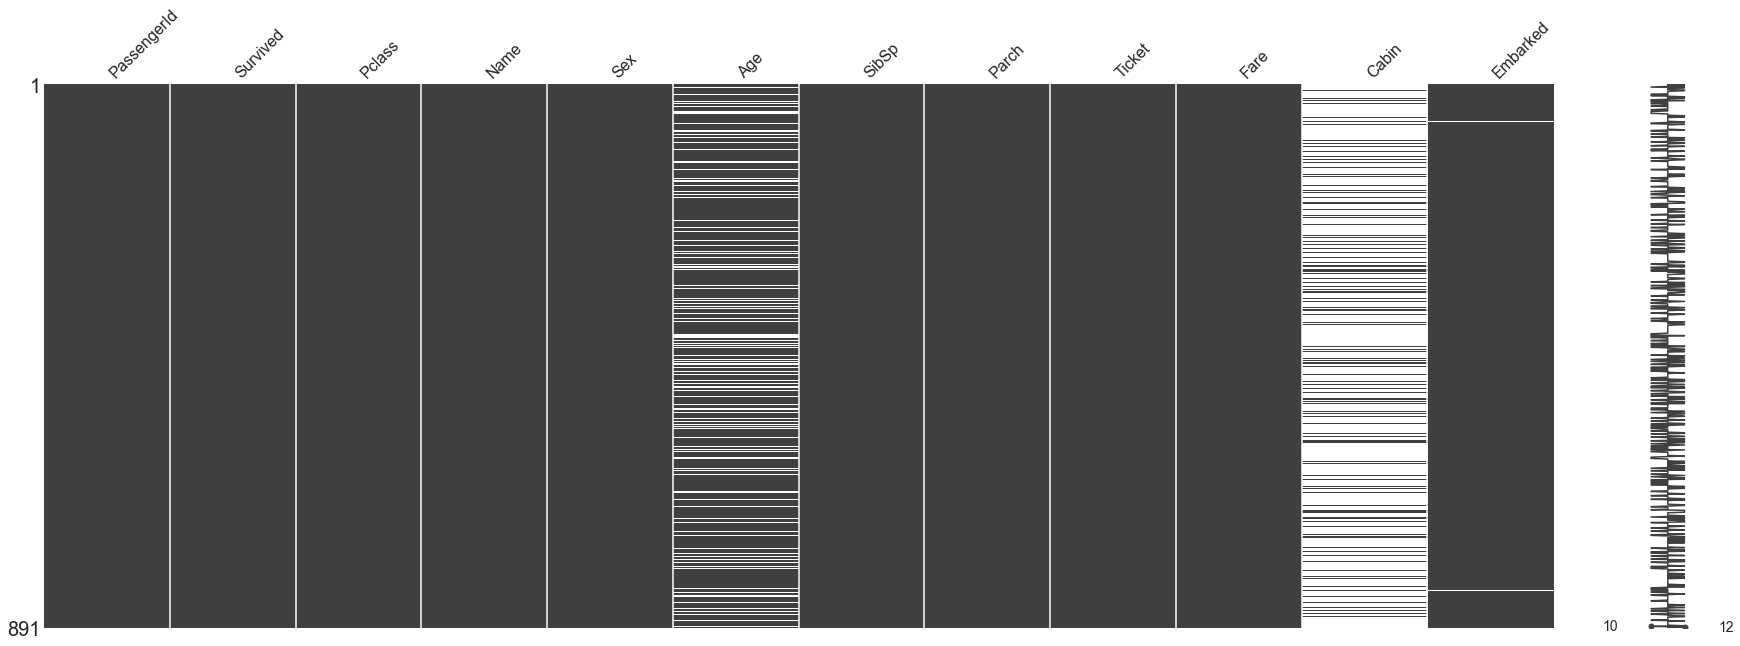

In [177]:
missingno.matrix(train,figsize=(30,10))

In [178]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [179]:
df_bin=pd.DataFrame()
df_con=pd.DataFrame()

In [180]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


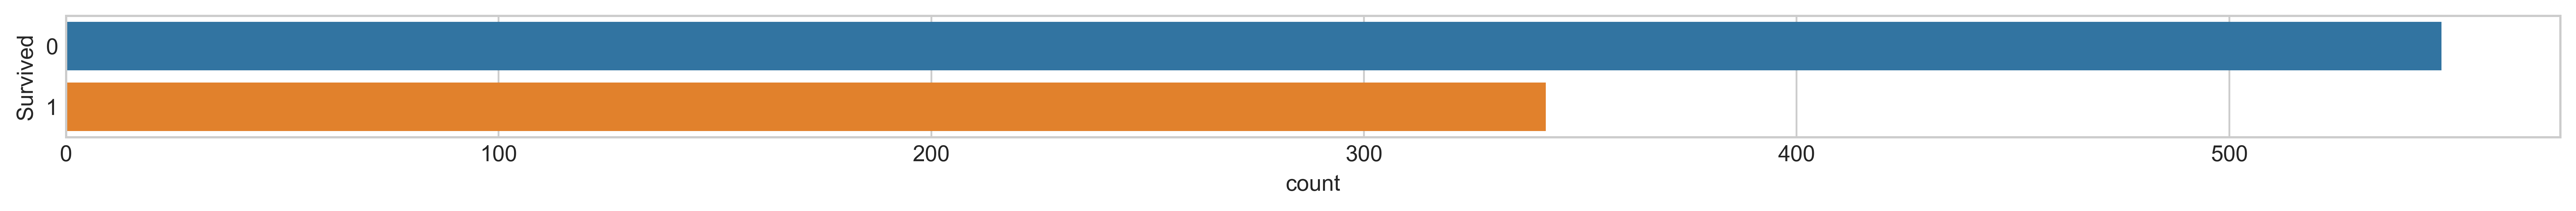

In [181]:
fig=plt.figure(figsize=(20,1),dpi=500)
sns.countplot(data=train,y='Survived')
print(train.Survived.value_counts())

In [182]:
df_bin['Survived']=train['Survived']
df_con["Survived"]=train['Survived']

In [183]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [184]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


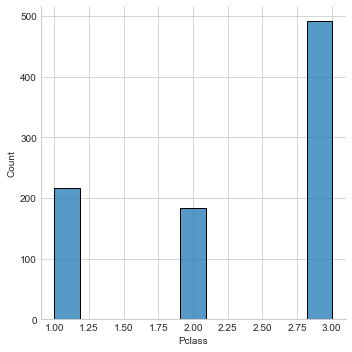

In [185]:
sns.displot(train.Pclass)

In [186]:
df_bin['Pclass']=train['Pclass']
df_con['Pclass']=train['Pclass']

In [187]:
df_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [188]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [189]:
train.Name.value_counts()

Davies, Master. John Morgan Jr                        1
Maenpaa, Mr. Matti Alexanteri                         1
Cunningham, Mr. Alfred Fleming                        1
Gustafsson, Mr. Johan Birger                          1
Ekstrom, Mr. Johan                                    1
                                                     ..
Kirkland, Rev. Charles Leonard                        1
Staneff, Mr. Ivan                                     1
Crosby, Miss. Harriet R                               1
Jermyn, Miss. Annie                                   1
Watt, Mrs. James (Elizabeth "Bessie" Inglis Milne)    1
Name: Name, Length: 891, dtype: int64

In [190]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


male      577
female    314
Name: Sex, dtype: int64


0

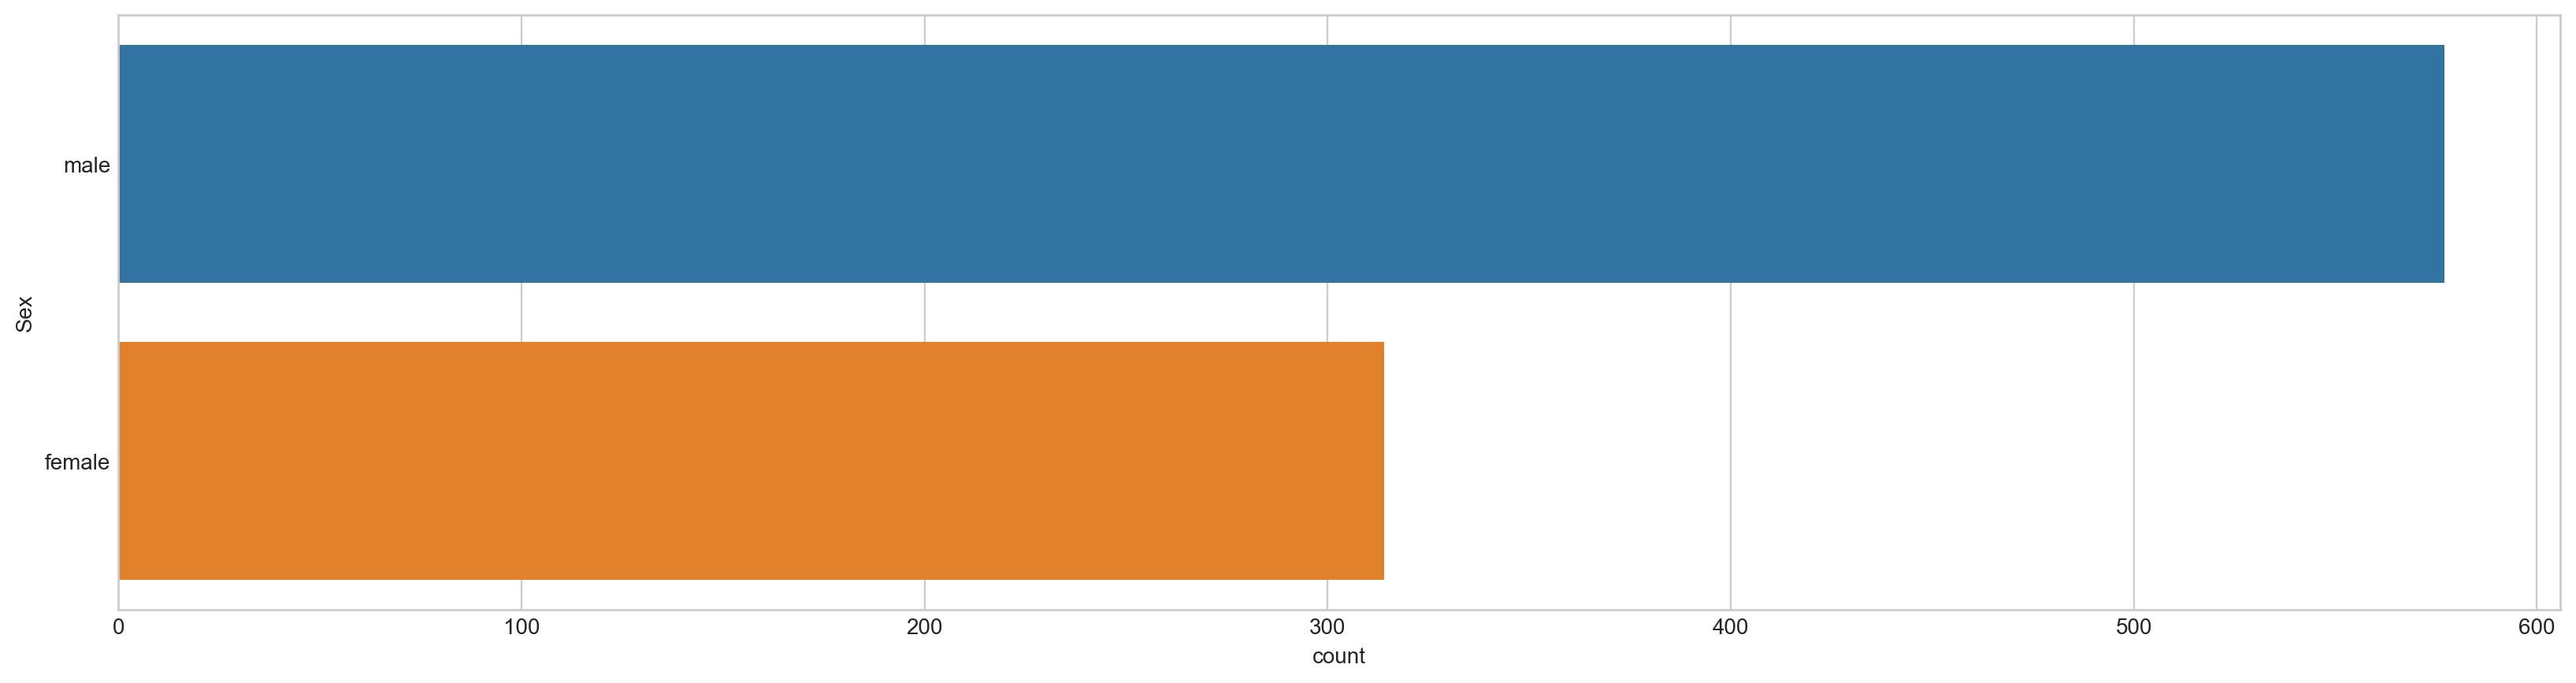

In [191]:
fig=plt.figure(figsize=(20,5),dpi=200)
sns.countplot(y='Sex',data=train)
print(train.Sex.value_counts())
train.Sex.isnull().sum()

In [192]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [193]:
df_bin['Sex']=train['Sex']
df_bin['Sex']=np.where(df_bin['Sex']=='female', 1,0)
df_con['Sex']=train['Sex']

In [194]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


In [195]:
df_con.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


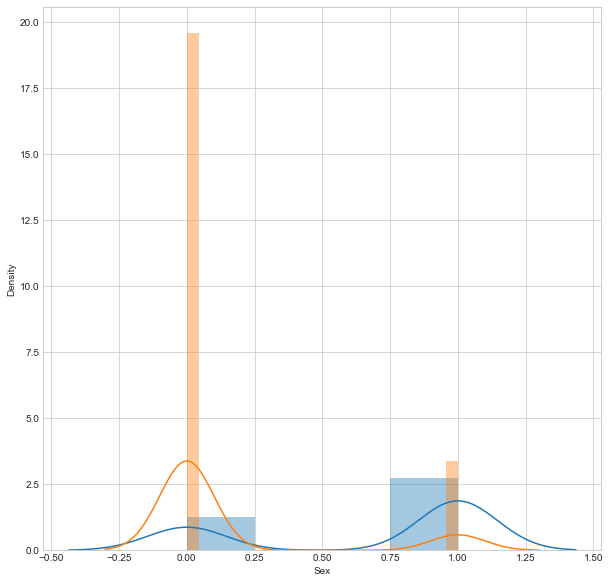

In [196]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

In [197]:
train.Age.isnull().sum()

177

In [198]:
#df_bin['Age']=pd.cut(train['Age'],10)
#df_con['Age']=train['Age']

In [199]:
train.SibSp.isnull().sum()

0

In [200]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [201]:
df_bin['SibSp']=train['SibSp']
df_con['SibSp']=train['SibSp']

In [202]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

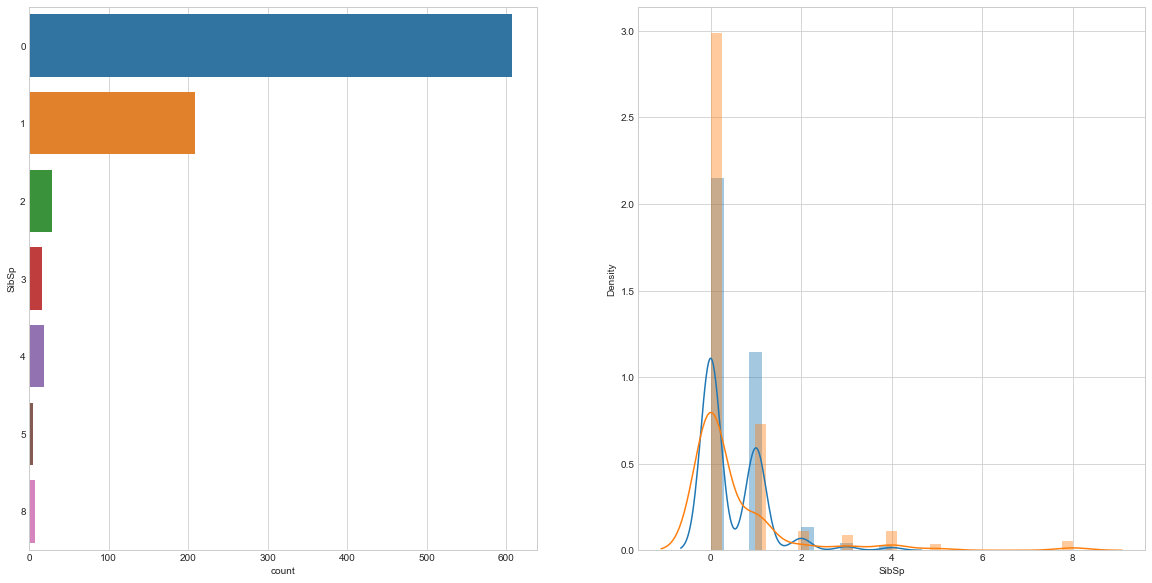

In [203]:
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

In [204]:
train.Parch.isnull().sum()

0

In [205]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [206]:
df_bin['Parch']=train['Parch']
df_con['Parch']=train['Parch']

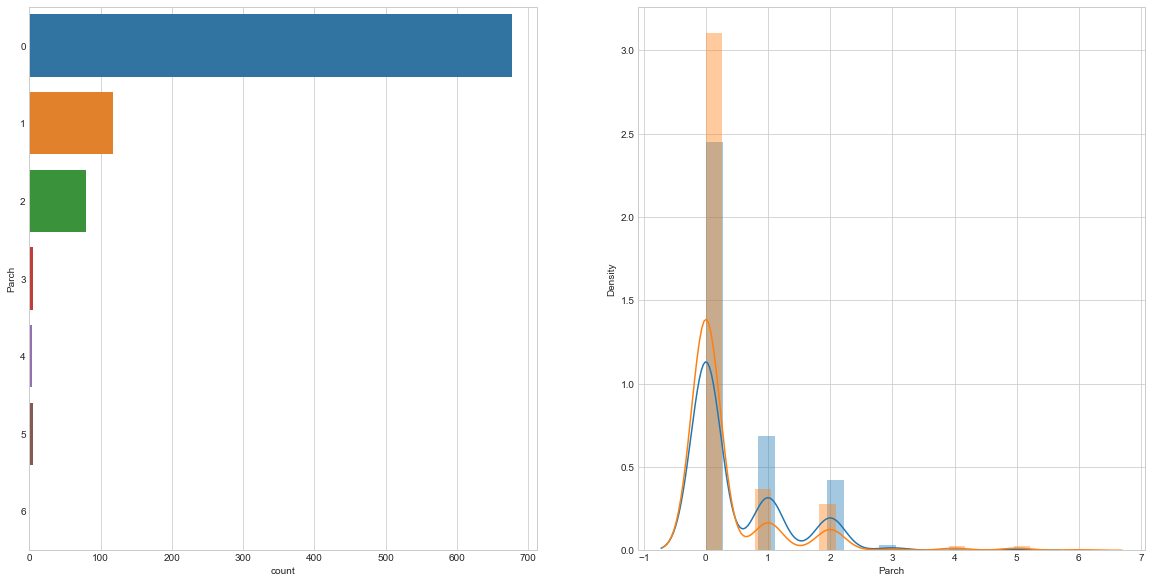

In [207]:

plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

In [208]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,0,1,0
1,1,1,1,1,0
2,1,3,1,0,0
3,1,1,1,1,0
4,0,3,0,0,0


In [209]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


In [210]:
train.Ticket.isnull().sum()

0

In [211]:
train.Ticket.value_counts()

CA. 2343     7
347082       7
1601         7
3101295      6
347088       6
            ..
A/5 21172    1
28425        1
330931       1
347743       1
347071       1
Name: Ticket, Length: 681, dtype: int64

In [212]:
len(train.Ticket.unique())

681

In [213]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [214]:
train.Fare.isnull().sum()

0

In [215]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [216]:
len(train.Fare.unique())

248

In [217]:
df_con['Fare']=train['Fare']
df_bin['Fare']=pd.cut(train['Fare'],bins=5)

In [218]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,"(-0.512, 102.466]"
1,1,1,1,1,0,"(-0.512, 102.466]"
2,1,3,1,0,0,"(-0.512, 102.466]"
3,1,1,1,1,0,"(-0.512, 102.466]"
4,0,3,0,0,0,"(-0.512, 102.466]"


In [219]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500


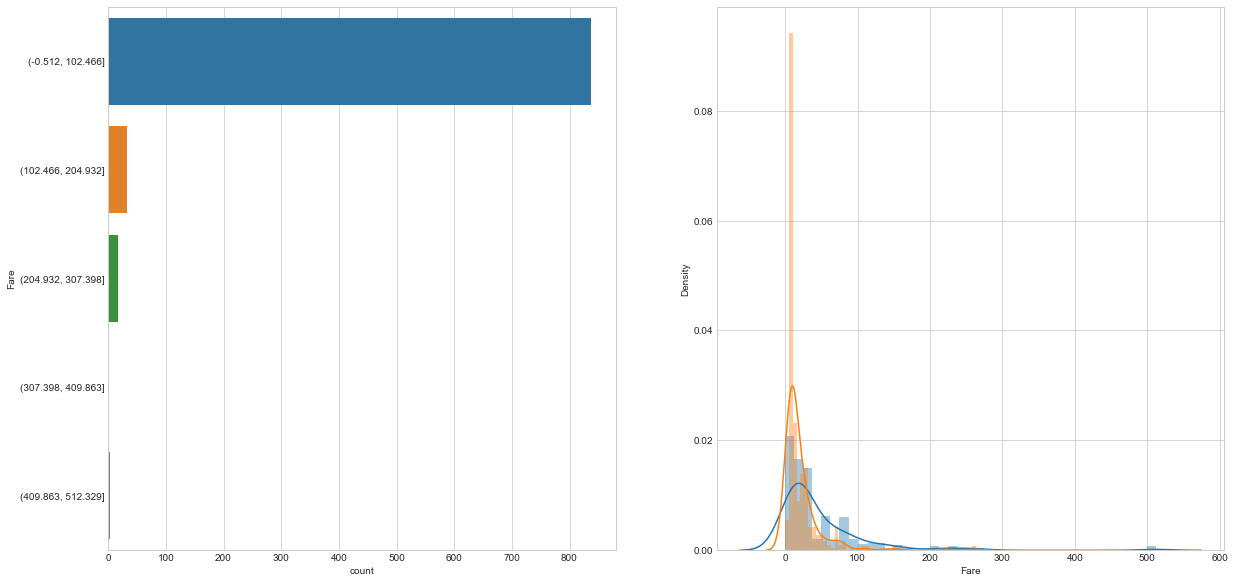

In [220]:
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

In [221]:
train.Cabin.isnull().sum()

687

In [222]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
D              3
              ..
D56            1
C49            1
C148           1
C99            1
E46            1
Name: Cabin, Length: 147, dtype: int64

In [223]:
train.Embarked.isnull().sum()

2

In [224]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Embarked'>

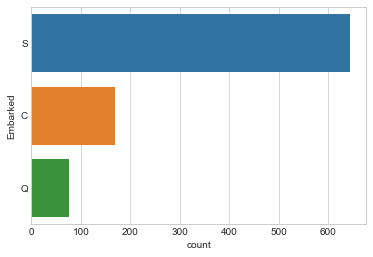

In [225]:
sns.countplot(data=train,y='Embarked')

In [226]:
df_bin['Embarked']=train['Embarked']
df_con['Embarked']=train['Embarked']

In [227]:
df_bin=df_bin.dropna(subset=['Embarked'])
df_con=df_con.dropna(subset=['Embarked'])

In [228]:
len(df_bin)


889

In [229]:
len(df_con)

889

In [230]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [231]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [232]:
one_hot_cols=df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc=pd.get_dummies(df_bin,columns=one_hot_cols)

In [233]:
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [234]:
df_con.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
5,0,3,male,0,0,8.4583,Q
6,0,1,male,0,0,51.8625,S
7,0,3,male,3,1,21.0750,S
8,1,3,female,0,2,11.1333,S
9,1,2,female,1,0,30.0708,C


In [235]:
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [236]:
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)


In [238]:
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [239]:
df_con_enc

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,13.0000,0,0,1,0,1,0,1,0
887,1,0,0,30.0000,0,0,1,1,0,1,0,0
888,0,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,0,0,30.0000,1,0,0,0,1,1,0,0


In [241]:
selected_df=df_con_enc

In [242]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [243]:
X_train=selected_df.drop('Survived',axis=1)
y_train=selected_df.Survived

In [246]:
X_train.shape

(889, 11)

In [247]:
y_train.shape

(889,)

In [248]:
def fit_ml_algo(algo,X_train,y_train,cv):
    model=algo.fit(X_train,y_train)
    acc=round(model.score(X_train,y_train)*100,2)
    train_pred=model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs=-1)
    acc_cv=round(metrics.accuracy_score(y_train,train_pred)*100,2)
    return train_pred,acc,acc_cv
    

In [253]:
#Logistic Regression
start_time=time.time()
train_pred_log,acc_log,acc_cv_log=fit_ml_algo(LogisticRegression(),X_train,y_train,10)
log_time=(time.time()-start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:04.086069


In [254]:
#KNeighbors
start_time=time.time()
train_pred_knn,acc_knn,acc_cv_knn=fit_ml_algo(KNeighborsClassifier(),X_train,y_train,10)
knn_time=(time.time()-start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:00.249331


In [259]:
#Gaussian
start_time=time.time()
train_pred_gaussian,acc_gaussian,acc_cv_gaussian=fit_ml_algo(GaussianNB(),X_train,y_train,10)
gaussian_time=(time.time()-time.time())
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00


In [265]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 75.59
Running Time: 0:00:00.277255


In [272]:
# Stochastic Gradient Descent
start_time=time.time()
train_pred_sgd,acc_sgd,acc_cv_sgd=fit_ml_algo(SGDClassifier(),X_train,y_train,10)
sgd_time=(time.time()-start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 77.17
Accuracy CV 10-Fold: 74.58
Running time: 0:00:00.078784


In [273]:
# Decision Tree Classifier
start_time=time.time()
train_pred_dt,acc_dt,acc_cv_dt=fit_ml_algo(DecisionTreeClassifier(),X_train,y_train,10)
dt_time=(time.time()-start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.31
Running time: 0:00:03.980354


In [276]:
#GradientBoostTrees
start_time=time.time()
train_pred_gbt,acc_gbt,acc_cv_gbt=fit_ml_algo(GradientBoostingClassifier(),X_train,y_train,10)
gbt_time=(time.time()-start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running time: 0:00:04.884931


In [277]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [278]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [286]:
cat_features=np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [287]:
train_pool=Pool(X_train,y_train,cat_features)

In [288]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [289]:
catboost_model=CatBoostClassifier(iterations=1000,custom_loss=['Accuracy'],loss_function='Logloss')
catboost_model.fit(train_pool,plot=True)
acc_catboost=round(catboost_model.score(X_train,y_train)*100,2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6862830	total: 192ms	remaining: 3m 11s
1:	learn: 0.6809444	total: 211ms	remaining: 1m 45s
2:	learn: 0.6751692	total: 234ms	remaining: 1m 17s
3:	learn: 0.6689060	total: 261ms	remaining: 1m 5s
4:	learn: 0.6632144	total: 284ms	remaining: 56.4s
5:	learn: 0.6576488	total: 300ms	remaining: 49.7s
6:	learn: 0.6544441	total: 307ms	remaining: 43.6s
7:	learn: 0.6490635	total: 327ms	remaining: 40.5s
8:	learn: 0.6443241	total: 368ms	remaining: 40.5s
9:	learn: 0.6395935	total: 393ms	remaining: 39s
10:	learn: 0.6345186	total: 413ms	remaining: 37.2s
11:	learn: 0.6305316	total: 437ms	remaining: 36s
12:	learn: 0.6275610	total: 449ms	remaining: 34.1s
13:	learn: 0.6225020	total: 471ms	remaining: 33.1s
14:	learn: 0.6179503	total: 490ms	remaining: 32.2s
15:	learn: 0.6140480	total: 500ms	remaining: 30.8s
16:	learn: 0.6100034	total: 517ms	remaining: 29.9s
17:	learn: 0.6049646	total: 541ms	remaining: 29.5s
18:	learn: 0.6025760	total: 549ms	remaining: 28.3s
19:	learn: 0

163:	learn: 0.4234396	total: 3.92s	remaining: 20s
164:	learn: 0.4228926	total: 3.96s	remaining: 20s
165:	learn: 0.4227463	total: 3.98s	remaining: 20s
166:	learn: 0.4226186	total: 4s	remaining: 20s
167:	learn: 0.4222141	total: 4.02s	remaining: 19.9s
168:	learn: 0.4219366	total: 4.04s	remaining: 19.9s
169:	learn: 0.4216245	total: 4.06s	remaining: 19.8s
170:	learn: 0.4213900	total: 4.08s	remaining: 19.8s
171:	learn: 0.4210836	total: 4.1s	remaining: 19.8s
172:	learn: 0.4208199	total: 4.13s	remaining: 19.7s
173:	learn: 0.4206421	total: 4.15s	remaining: 19.7s
174:	learn: 0.4201114	total: 4.17s	remaining: 19.7s
175:	learn: 0.4198212	total: 4.2s	remaining: 19.6s
176:	learn: 0.4195834	total: 4.22s	remaining: 19.6s
177:	learn: 0.4195685	total: 4.23s	remaining: 19.5s
178:	learn: 0.4194809	total: 4.25s	remaining: 19.5s
179:	learn: 0.4191368	total: 4.28s	remaining: 19.5s
180:	learn: 0.4185960	total: 4.3s	remaining: 19.5s
181:	learn: 0.4184559	total: 4.35s	remaining: 19.5s
182:	learn: 0.4180542	tota

329:	learn: 0.3926315	total: 8.19s	remaining: 16.6s
330:	learn: 0.3925085	total: 8.21s	remaining: 16.6s
331:	learn: 0.3921820	total: 8.25s	remaining: 16.6s
332:	learn: 0.3920570	total: 8.27s	remaining: 16.6s
333:	learn: 0.3918707	total: 8.3s	remaining: 16.6s
334:	learn: 0.3917635	total: 8.33s	remaining: 16.5s
335:	learn: 0.3916127	total: 8.36s	remaining: 16.5s
336:	learn: 0.3914735	total: 8.38s	remaining: 16.5s
337:	learn: 0.3914486	total: 8.41s	remaining: 16.5s
338:	learn: 0.3912764	total: 8.44s	remaining: 16.4s
339:	learn: 0.3911365	total: 8.46s	remaining: 16.4s
340:	learn: 0.3910828	total: 8.49s	remaining: 16.4s
341:	learn: 0.3910413	total: 8.52s	remaining: 16.4s
342:	learn: 0.3910351	total: 8.54s	remaining: 16.4s
343:	learn: 0.3908388	total: 8.57s	remaining: 16.3s
344:	learn: 0.3907468	total: 8.6s	remaining: 16.3s
345:	learn: 0.3905556	total: 8.63s	remaining: 16.3s
346:	learn: 0.3905329	total: 8.65s	remaining: 16.3s
347:	learn: 0.3904624	total: 8.68s	remaining: 16.3s
348:	learn: 0.

497:	learn: 0.3769625	total: 11.7s	remaining: 11.8s
498:	learn: 0.3768613	total: 11.7s	remaining: 11.8s
499:	learn: 0.3768611	total: 11.7s	remaining: 11.7s
500:	learn: 0.3768153	total: 11.8s	remaining: 11.7s
501:	learn: 0.3767849	total: 11.8s	remaining: 11.7s
502:	learn: 0.3765500	total: 11.8s	remaining: 11.7s
503:	learn: 0.3763980	total: 11.8s	remaining: 11.6s
504:	learn: 0.3763692	total: 11.8s	remaining: 11.6s
505:	learn: 0.3763085	total: 11.9s	remaining: 11.6s
506:	learn: 0.3761631	total: 11.9s	remaining: 11.5s
507:	learn: 0.3760934	total: 11.9s	remaining: 11.5s
508:	learn: 0.3760498	total: 11.9s	remaining: 11.5s
509:	learn: 0.3760150	total: 11.9s	remaining: 11.5s
510:	learn: 0.3759970	total: 12s	remaining: 11.5s
511:	learn: 0.3759798	total: 12s	remaining: 11.4s
512:	learn: 0.3759568	total: 12s	remaining: 11.4s
513:	learn: 0.3758344	total: 12s	remaining: 11.4s
514:	learn: 0.3757406	total: 12s	remaining: 11.3s
515:	learn: 0.3757113	total: 12.1s	remaining: 11.3s
516:	learn: 0.3755908	

665:	learn: 0.3638903	total: 15.4s	remaining: 7.74s
666:	learn: 0.3637239	total: 15.5s	remaining: 7.72s
667:	learn: 0.3635881	total: 15.5s	remaining: 7.69s
668:	learn: 0.3634772	total: 15.5s	remaining: 7.67s
669:	learn: 0.3634068	total: 15.5s	remaining: 7.64s
670:	learn: 0.3633759	total: 15.5s	remaining: 7.62s
671:	learn: 0.3631802	total: 15.6s	remaining: 7.6s
672:	learn: 0.3631026	total: 15.6s	remaining: 7.57s
673:	learn: 0.3630056	total: 15.6s	remaining: 7.55s
674:	learn: 0.3628564	total: 15.6s	remaining: 7.53s
675:	learn: 0.3628277	total: 15.7s	remaining: 7.5s
676:	learn: 0.3628277	total: 15.7s	remaining: 7.48s
677:	learn: 0.3627016	total: 15.7s	remaining: 7.45s
678:	learn: 0.3626910	total: 15.7s	remaining: 7.42s
679:	learn: 0.3624607	total: 15.7s	remaining: 7.4s
680:	learn: 0.3623905	total: 15.7s	remaining: 7.38s
681:	learn: 0.3623699	total: 15.8s	remaining: 7.35s
682:	learn: 0.3622673	total: 15.8s	remaining: 7.33s
683:	learn: 0.3622159	total: 15.8s	remaining: 7.3s
684:	learn: 0.36

826:	learn: 0.3527494	total: 18.9s	remaining: 3.96s
827:	learn: 0.3527097	total: 18.9s	remaining: 3.94s
828:	learn: 0.3525818	total: 19s	remaining: 3.91s
829:	learn: 0.3525719	total: 19s	remaining: 3.89s
830:	learn: 0.3523327	total: 19s	remaining: 3.87s
831:	learn: 0.3523023	total: 19s	remaining: 3.84s
832:	learn: 0.3522949	total: 19s	remaining: 3.82s
833:	learn: 0.3521358	total: 19.1s	remaining: 3.79s
834:	learn: 0.3521053	total: 19.1s	remaining: 3.77s
835:	learn: 0.3520985	total: 19.1s	remaining: 3.75s
836:	learn: 0.3520746	total: 19.1s	remaining: 3.73s
837:	learn: 0.3519963	total: 19.2s	remaining: 3.71s
838:	learn: 0.3519587	total: 19.2s	remaining: 3.68s
839:	learn: 0.3518946	total: 19.2s	remaining: 3.66s
840:	learn: 0.3518871	total: 19.3s	remaining: 3.64s
841:	learn: 0.3518257	total: 19.3s	remaining: 3.62s
842:	learn: 0.3518257	total: 19.3s	remaining: 3.59s
843:	learn: 0.3516969	total: 19.4s	remaining: 3.58s
844:	learn: 0.3516134	total: 19.4s	remaining: 3.56s
845:	learn: 0.3515626	

987:	learn: 0.3404887	total: 23.4s	remaining: 284ms
988:	learn: 0.3404766	total: 23.4s	remaining: 260ms
989:	learn: 0.3404401	total: 23.4s	remaining: 236ms
990:	learn: 0.3403797	total: 23.4s	remaining: 213ms
991:	learn: 0.3403515	total: 23.5s	remaining: 189ms
992:	learn: 0.3402624	total: 23.5s	remaining: 166ms
993:	learn: 0.3402175	total: 23.5s	remaining: 142ms
994:	learn: 0.3399939	total: 23.6s	remaining: 118ms
995:	learn: 0.3399342	total: 23.6s	remaining: 94.7ms
996:	learn: 0.3398669	total: 23.6s	remaining: 71.1ms
997:	learn: 0.3398219	total: 23.6s	remaining: 47.4ms
998:	learn: 0.3397748	total: 23.7s	remaining: 23.7ms
999:	learn: 0.3396214	total: 23.7s	remaining: 0us


In [291]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6746718	test: 0.6751020	best: 0.6751020 (0)
1:	learn: 0.6573540	test: 0.6583602	best: 0.6583602 (1)
2:	learn: 0.6408329	test: 0.6429257	best: 0.6429257 (2)
3:	learn: 0.6253924	test: 0.6283059	best: 0.6283059 (3)
4:	learn: 0.6114190	test: 0.6150989	best: 0.6150989 (4)
5:	learn: 0.6004513	test: 0.6048524	best: 0.6048524 (5)
6:	learn: 0.5900482	test: 0.5949158	best: 0.5949158 (6)
7:	learn: 0.5800356	test: 0.5853301	best: 0.5853301 (7)
8:	learn: 0.5702086	test: 0.5757925	best: 0.5757925 (8)
9:	learn: 0.5612227	test: 0.5675857	best: 0.5675857 (9)
10:	learn: 0.5522686	test: 0.5589941	best: 0.5589941 (10)
11:	learn: 0.5447302	test: 0.5517930	best: 0.5517930 (11)
12:	learn: 0.5377424	test: 0.5449873	best: 0.5449873 (12)
13:	learn: 0.5305336	test: 0.5382423	best: 0.5382423 (13)
14:	learn: 0.5241296	test: 0.5323280	best: 0.5323280 (14)
15:	learn: 0.5171284	test: 0.5265741	best: 0.5265741 (15)
16:	learn: 0.5113308	test: 0.5214578	best: 0.5214578 (16)
17:	learn: 0.5063945	test: 0.51688

164:	learn: 0.3723215	test: 0.4383283	best: 0.4375885 (133)
165:	learn: 0.3719399	test: 0.4382079	best: 0.4375885 (133)
166:	learn: 0.3716950	test: 0.4382140	best: 0.4375885 (133)
167:	learn: 0.3714294	test: 0.4382364	best: 0.4375885 (133)
168:	learn: 0.3710975	test: 0.4383379	best: 0.4375885 (133)
169:	learn: 0.3708151	test: 0.4382247	best: 0.4375885 (133)
170:	learn: 0.3705341	test: 0.4382206	best: 0.4375885 (133)
171:	learn: 0.3702579	test: 0.4381828	best: 0.4375885 (133)
172:	learn: 0.3700014	test: 0.4380525	best: 0.4375885 (133)
173:	learn: 0.3697051	test: 0.4380720	best: 0.4375885 (133)
174:	learn: 0.3694642	test: 0.4380150	best: 0.4375885 (133)
175:	learn: 0.3691009	test: 0.4380279	best: 0.4375885 (133)
176:	learn: 0.3688905	test: 0.4381575	best: 0.4375885 (133)
177:	learn: 0.3686335	test: 0.4382308	best: 0.4375885 (133)
178:	learn: 0.3684197	test: 0.4383125	best: 0.4375885 (133)
179:	learn: 0.3681903	test: 0.4383017	best: 0.4375885 (133)
180:	learn: 0.3679923	test: 0.4383894	be

304:	learn: 0.3375607	test: 0.4376942	best: 0.4375885 (133)
305:	learn: 0.3373273	test: 0.4377882	best: 0.4375885 (133)
306:	learn: 0.3370584	test: 0.4379255	best: 0.4375885 (133)
307:	learn: 0.3368230	test: 0.4378568	best: 0.4375885 (133)
308:	learn: 0.3365431	test: 0.4377564	best: 0.4375885 (133)
309:	learn: 0.3363557	test: 0.4377360	best: 0.4375885 (133)
310:	learn: 0.3362263	test: 0.4376479	best: 0.4375885 (133)
311:	learn: 0.3360123	test: 0.4377658	best: 0.4375885 (133)
312:	learn: 0.3357681	test: 0.4377828	best: 0.4375885 (133)
313:	learn: 0.3355690	test: 0.4378422	best: 0.4375885 (133)
314:	learn: 0.3353338	test: 0.4378656	best: 0.4375885 (133)
315:	learn: 0.3349513	test: 0.4377517	best: 0.4375885 (133)
316:	learn: 0.3346888	test: 0.4379269	best: 0.4375885 (133)
317:	learn: 0.3344431	test: 0.4380104	best: 0.4375885 (133)
318:	learn: 0.3340466	test: 0.4378077	best: 0.4375885 (133)
319:	learn: 0.3337123	test: 0.4377352	best: 0.4375885 (133)
320:	learn: 0.3334570	test: 0.4377137	be

440:	learn: 0.3043265	test: 0.4335227	best: 0.4333669 (432)
441:	learn: 0.3041210	test: 0.4334722	best: 0.4333669 (432)
442:	learn: 0.3039089	test: 0.4333488	best: 0.4333488 (442)
443:	learn: 0.3037218	test: 0.4334071	best: 0.4333488 (442)
444:	learn: 0.3034592	test: 0.4334150	best: 0.4333488 (442)
445:	learn: 0.3032770	test: 0.4333923	best: 0.4333488 (442)
446:	learn: 0.3031330	test: 0.4332800	best: 0.4332800 (446)
447:	learn: 0.3028994	test: 0.4329278	best: 0.4329278 (447)
448:	learn: 0.3027010	test: 0.4330282	best: 0.4329278 (447)
449:	learn: 0.3024936	test: 0.4328578	best: 0.4328578 (449)
450:	learn: 0.3023059	test: 0.4327987	best: 0.4327987 (450)
451:	learn: 0.3020904	test: 0.4329107	best: 0.4327987 (450)
452:	learn: 0.3019433	test: 0.4329241	best: 0.4327987 (450)
453:	learn: 0.3018141	test: 0.4329378	best: 0.4327987 (450)
454:	learn: 0.3015555	test: 0.4328649	best: 0.4327987 (450)
455:	learn: 0.3013535	test: 0.4327188	best: 0.4327188 (455)
456:	learn: 0.3010889	test: 0.4327817	be

580:	learn: 0.2780042	test: 0.4327089	best: 0.4320750 (502)
581:	learn: 0.2778893	test: 0.4326415	best: 0.4320750 (502)
582:	learn: 0.2776271	test: 0.4327159	best: 0.4320750 (502)
583:	learn: 0.2774387	test: 0.4328132	best: 0.4320750 (502)
584:	learn: 0.2772571	test: 0.4326921	best: 0.4320750 (502)
585:	learn: 0.2771170	test: 0.4326261	best: 0.4320750 (502)
586:	learn: 0.2768953	test: 0.4328484	best: 0.4320750 (502)
587:	learn: 0.2767808	test: 0.4328367	best: 0.4320750 (502)
588:	learn: 0.2765733	test: 0.4328775	best: 0.4320750 (502)
589:	learn: 0.2764428	test: 0.4328948	best: 0.4320750 (502)
590:	learn: 0.2762799	test: 0.4328413	best: 0.4320750 (502)
591:	learn: 0.2760702	test: 0.4330142	best: 0.4320750 (502)
592:	learn: 0.2759141	test: 0.4330439	best: 0.4320750 (502)
593:	learn: 0.2757603	test: 0.4329222	best: 0.4320750 (502)
594:	learn: 0.2755819	test: 0.4330234	best: 0.4320750 (502)
595:	learn: 0.2754550	test: 0.4329475	best: 0.4320750 (502)
596:	learn: 0.2752413	test: 0.4329378	be

715:	learn: 0.2580075	test: 0.4335891	best: 0.4320750 (502)
716:	learn: 0.2578844	test: 0.4335876	best: 0.4320750 (502)
717:	learn: 0.2577474	test: 0.4336855	best: 0.4320750 (502)
718:	learn: 0.2576249	test: 0.4337135	best: 0.4320750 (502)
719:	learn: 0.2574537	test: 0.4336854	best: 0.4320750 (502)
720:	learn: 0.2573392	test: 0.4337262	best: 0.4320750 (502)
721:	learn: 0.2572447	test: 0.4338422	best: 0.4320750 (502)
722:	learn: 0.2570845	test: 0.4338724	best: 0.4320750 (502)
723:	learn: 0.2569507	test: 0.4338832	best: 0.4320750 (502)
724:	learn: 0.2567908	test: 0.4339727	best: 0.4320750 (502)
725:	learn: 0.2566448	test: 0.4339666	best: 0.4320750 (502)
726:	learn: 0.2565084	test: 0.4339888	best: 0.4320750 (502)
727:	learn: 0.2563658	test: 0.4339738	best: 0.4320750 (502)
728:	learn: 0.2562654	test: 0.4339195	best: 0.4320750 (502)
729:	learn: 0.2561733	test: 0.4339471	best: 0.4320750 (502)
730:	learn: 0.2559964	test: 0.4340205	best: 0.4320750 (502)
731:	learn: 0.2559012	test: 0.4339268	be

853:	learn: 0.2398083	test: 0.4355943	best: 0.4320750 (502)
854:	learn: 0.2397026	test: 0.4355511	best: 0.4320750 (502)
855:	learn: 0.2395772	test: 0.4354684	best: 0.4320750 (502)
856:	learn: 0.2394223	test: 0.4354681	best: 0.4320750 (502)
857:	learn: 0.2393145	test: 0.4354890	best: 0.4320750 (502)
858:	learn: 0.2392194	test: 0.4354568	best: 0.4320750 (502)
859:	learn: 0.2391231	test: 0.4355438	best: 0.4320750 (502)
860:	learn: 0.2390509	test: 0.4355163	best: 0.4320750 (502)
861:	learn: 0.2389130	test: 0.4355907	best: 0.4320750 (502)
862:	learn: 0.2388195	test: 0.4356582	best: 0.4320750 (502)
863:	learn: 0.2386774	test: 0.4356634	best: 0.4320750 (502)
864:	learn: 0.2385319	test: 0.4357166	best: 0.4320750 (502)
865:	learn: 0.2384268	test: 0.4357626	best: 0.4320750 (502)
866:	learn: 0.2383096	test: 0.4358128	best: 0.4320750 (502)
867:	learn: 0.2381944	test: 0.4357809	best: 0.4320750 (502)
868:	learn: 0.2381028	test: 0.4357579	best: 0.4320750 (502)
869:	learn: 0.2379413	test: 0.4356269	be

996:	learn: 0.2243685	test: 0.4375864	best: 0.4320750 (502)
997:	learn: 0.2242730	test: 0.4376085	best: 0.4320750 (502)
998:	learn: 0.2241963	test: 0.4376383	best: 0.4320750 (502)
999:	learn: 0.2241275	test: 0.4377127	best: 0.4320750 (502)	total: 3m 50s	remaining: 0us


In [292]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 83.91
Accuracy cross-validation 10-Fold: 81.32
Running Time: 0:03:51.513662


In [294]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Regular Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Regular Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.61
7,CatBoost,83.91
0,KNN,83.46
1,Logistic Regression,79.98
2,Naive Bayes,78.52
4,Linear SVC,78.52
3,Stochastic Gradient Decent,77.17


In [295]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,81.32
6,Gradient Boosting Trees,80.65
5,Decision Tree,80.31
1,Logistic Regression,79.42
2,Naive Bayes,77.95
0,KNN,76.72
4,Linear SVC,75.59
3,Stochastic Gradient Decent,74.58


In [296]:
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
4,0.992061,embarked_Q
3,1.213711,embarked_C
5,1.677219,embarked_S
9,2.178083,pclass_2
8,3.243021,pclass_1
0,10.797435,SibSp
10,11.205450,pclass_3
1,13.988886,Parch
2,15.753218,Fare
6,17.695520,sex_female


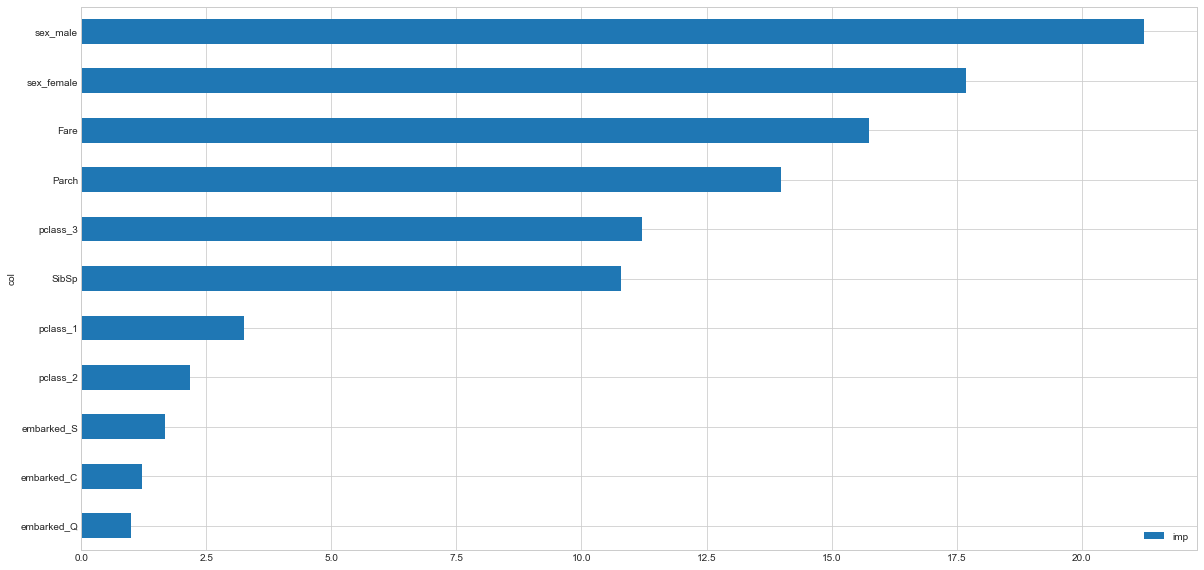

In [297]:
feature_importance(catboost_model, X_train)

In [298]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8286662683284687
Recall: 0.6833382352941176
F1: 0.7489789466084935
AUC: 0.8842839467480982


In [299]:
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [300]:
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [301]:
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [302]:
predictions = catboost_model.predict(test[wanted_test_columns])

In [303]:
predictions[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [304]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [305]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [306]:
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [307]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [308]:
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [309]:
submission.to_csv('../catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [310]:
submissions_check = pd.read_csv("../catboost_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
